# Outlier removal in Python using IQR rule 

In short outliers can be a bit of a pain and have an impact on the results. Grubbs (1969) states an outlier “is an observation point that is distant from other observations”. They can usually be seen when we plot the data, below we can see 1, maybe 2 outliers in the density plot. 2.5 is a clear outliers and 2.0 may or may not be.

<img class=" wp-image-138 size-medium aligncenter" src="http://stamfordresearch.com/wp-content/uploads/2015/02/density-plot-300x284.jpg" alt="Density Plot (outlier)" width="300" height="284" srcset="http://stamfordresearch.com/wp-content/uploads/2015/02/density-plot-300x284.jpg 300w, http://stamfordresearch.com/wp-content/uploads/2015/02/density-plot.jpg 427w" sizes="(max-width: 300px) 100vw, 300px">

So, one of the ways that we can identify outliers is through the use of the Interquartile Range Rule  (IQR Rule). This sets a min and max value for the range based on the 1st and 3rd quartile.

Step 1, get the  Interquartile Range:

<img class="aligncenter size-full wp-image-139" src="http://stamfordresearch.com/wp-content/uploads/2015/02/IQR.png" alt="" width="125" height="16" scale="0">

Step 2, calculate the upper and lower values:
<img class="aligncenter size-full wp-image-141" src="http://stamfordresearch.com/wp-content/uploads/2015/02/minIQR.png" alt="" width="196" height="18" scale="0">
<img class="aligncenter size-full wp-image-145" src="http://stamfordresearch.com/wp-content/uploads/2015/02/MaxIQR.png" alt="MaxIQR" width="198" height="18" scale="0">

Step 3, remove anything greater than max, or less than min.

This time we’ll work along with the Titanic dataset. We will also do a little extra thing – log transform the data.

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style("whitegrid")
sns.set_context("paper")


- pd.set_options are set to display only 10 rows but all columns. 

- We’re using Seaborn (external link) for some box plots. 

- Import Seaborn and use set_style and set_context. This makes the Matplotlib plots look better (publication quality).

In [35]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.shape

(891, 12)

We should see the full dataset, note: it has 891 rows and 12 columns.

# Visualize the data

We are going to work with the Fares variable, so lets have a look at it.

We are also setting the x axis to a min and max values based on the min and max of the variable.

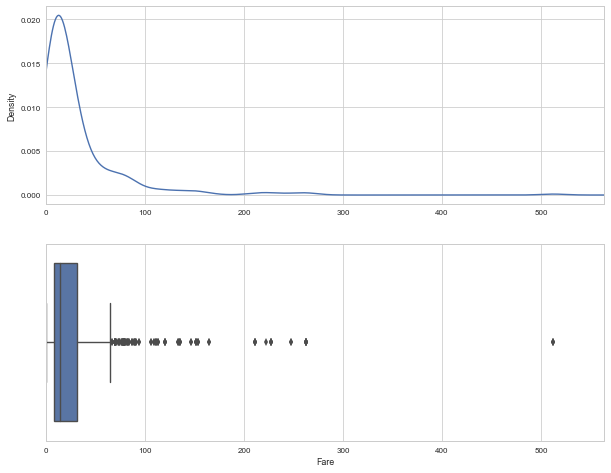

In [37]:
i = 'Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

Here we have two plots, the density plot and the box plot. This is a good way to view the data as we can see in the density plot (top) that there is some data points in the tails but it is difficult to see, however it is clear in the box plot.

# Transform the data

Clean the data

In [38]:
# Remove any zeros (otherwise we get (-inf)
df.loc[df.Fare == 0, 'Fare'] = np.nan

# Drop NA
df.dropna(inplace=True)

# Log Transform
df['Log_' + i] = np.log(df[i])

** Here's what we've done.**
1. We set all zero values in Fares to NaN. A zero can cause a problem when using a log transform
2. We drop all the rows with a NaN, this is a bit extreme in this example (you can change df.dropna(inplace=True) to df.dropna(subset=[‘Fare’], inplace=True) to keep more data)
3. We create a new variable called ‘Log_’ + i where i is ‘Fare’, so the new variable is Log_Fare

Plot the values as before changing i to 'Log_Fare'

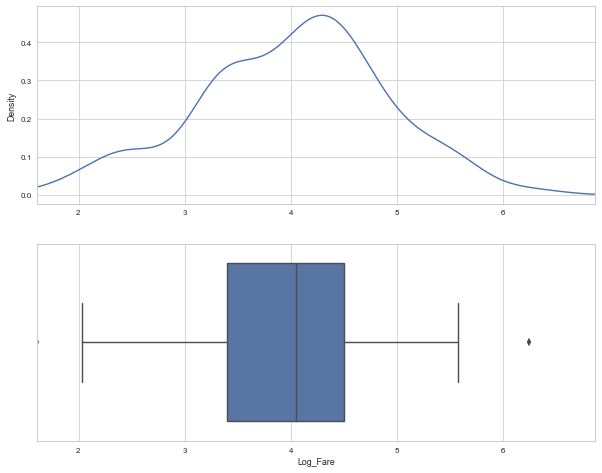

In [39]:
i = 'Log_Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

# Determine min & max

Next we need to determine the min and max cuttoffs for detecting the outliers.

Step 1, get the  Interquartile Range:

<img class="aligncenter size-full wp-image-139" src="http://stamfordresearch.com/wp-content/uploads/2015/02/IQR.png" alt="" width="125" height="16" scale="0">

Step 2, calculate the upper and lower values:
<img class="aligncenter size-full wp-image-141" src="http://stamfordresearch.com/wp-content/uploads/2015/02/minIQR.png" alt="" width="196" height="18" scale="0">
<img class="aligncenter size-full wp-image-145" src="http://stamfordresearch.com/wp-content/uploads/2015/02/MaxIQR.png" alt="MaxIQR" width="198" height="18" scale="0">

In [40]:
q75, q25 = np.percentile(df.Log_Fare.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

We can visualise this using similar code as shown above by adding plt.axvline.

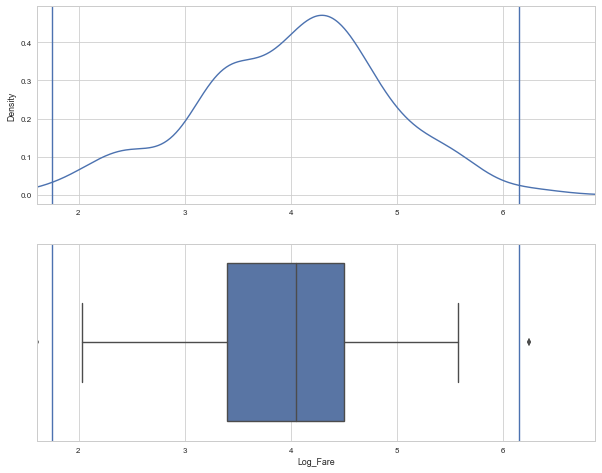

In [41]:
i = 'Log_Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

# Finishing touches

Now lets identify the outliers. First we set a new variable in the dataframe called ‘Outlier’ defaulted to 0, then is a row is outside this range we set it to 1. 

**Note: i should still be ‘Log_Fare’**

In [42]:
df['Outlier'] = 0
 
df.loc[df[i] < min, 'Outlier'] = 1
df.loc[df[i] > max, 'Outlier'] = 1

In [43]:
df2 = df[df["Outlier"] == 0]

Now we can plot the original data and the data without the outliers in (Clean Data).

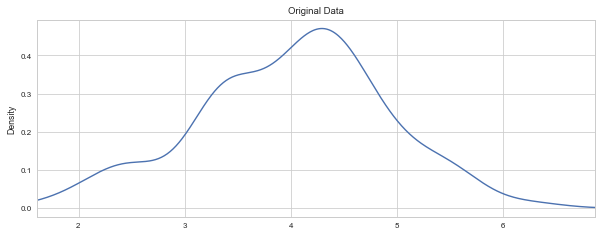

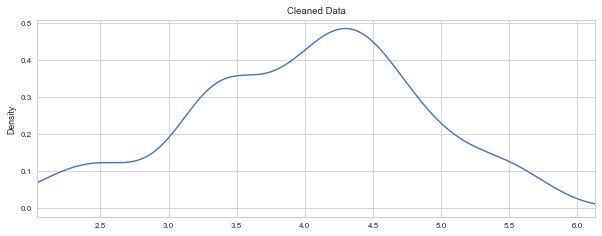

In [46]:
i = 'Log_Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.title("Original Data")
plt.xlim(df[i].min(), df[i].max()*1.1)
ax = df[i].plot(kind='kde')

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.title("Cleaned Data")
plt.xlim(df2[i].min(), df2[i].max()*1.1)
ax = df2[i].plot(kind='kde')